# Modélisation géométrique d’un robot manipulateur

Le but de ce bureau d’études est de développer les modèles géométriques du robot industriel Universal Robot UR3. Dans un premier temps on calculera le MGD du 6R. Ensuite afin de simplifier le calcul du MGI on supposera que les 3 dernières liaisons sont fixes afin de se ramener à un robot 3R.

## Présentation du robot
L’UR3 d’Universal Robot est un robot 6R. La figure 1 vous indique ses axes de rotations ainsi que ses dimensions nécessaires pour établir les modèles.

La configuration du robot est définie dans l’espace généralisé par `q=(q1,q2,q3,q4,q5,q6)^T` .  
On ne considère pas de butée mécanique sur ce robot dans un premier temps, i.e., `q ∈ R6`.  
La situation de l’O.T. est définie par la position du point `Oe` et par l’orientation du repère de l’effecteur Re par rapport au repère de base `R0` , `(O0,x0,y0,z0)`.

![](pics/UR3.png)
![](pics/Dimensions.png)


## Modélisation du robot UR3

### Modélisation géométrique directe de l’UR3 (MGD)

Sachant que l’origine du repère 3 (O3) et que le repère outil (noté e) sont imposés, calculer le MGD de ce robot.

![](pics/without_repere.png)

#### Préparation
* En vous servant des données techniques (figure 1) indiquer les dimensions manquantes sur la figure 2.
* Placer les repères.
* Déterminer les paramètres de DHM associés au placement des repères (figure 2).

#### Travail à faire
* Utiliser les fonctions python du fichier pour calculer votre MGD de manière numérique.

In [21]:
import numpy as np
import math  as m

class UR3:
    def __init__(self):
        self.nb_ddl =   6
        self.o0o1   =   152    # mm
        self.o1o2   =   120    # mm
        self.o2o3   =   244    # mm
        self.o3o4   =   np.sqrt((213**2)+((93-83)**2))    # mm
        self.o4o5   =   83     # mm
        self.o6oE   =   82     # mm
        a3=213
        r4=10

        #Paramètres de DHM
        self.a=[0,0,self.o2o3,a3,0,0]
        self.alpha=[0,m.pi/2,0,0,m.pi/2,m.pi/2]
        self.r=[self.o0o1,-self.o1o2,0,r4,self.o4o5,0]
        # self.theta = qi 

    def MGD(self,q):

        # Calcul des matrices de passages
        for i in range(self.nb_ddl-1):
            T=np.array([[np.cos(q[i])                       ,   -np.sin(q[i])                       ,   0                       ,   self.a[i]], 
                        [np.cos(self.alpha[i])*np.sin(q[i]) ,   np.cos(self.alpha[i])*np.cos(q[i])  ,   -np.sin(self.alpha[i])  ,   -self.r[i]*np.sin(self.alpha[i])],
                        [np.sin(self.alpha[i])*np.sin(q[i]) ,   np.sin(self.alpha[i])*np.cos(q[i])  ,   np.cos(self.alpha[i])   ,   self.r[i]*np.cos(self.alpha[i])],
                        [0                                  ,   0                                   ,   0                       ,   1]])
            if i!=0:
                T0N=T0N@T
            else:
                T0N=T
            #print("T",i,i+1,"\n",T0N,"\n")

        Vp  = T0N[:3,3:]
        print("T06")
        print ("Xp = ", Vp[0][0])
        print ("Yp = ", Vp[1][0])
        print ("Zp = ", Vp[2][0])

        # Détermination de la position du repère de l'OT 
        T0E = T0N @ np.array([[ 1   ,   0   ,   0   ,   0           ], 
                              [ 0   ,   1   ,   0   ,   0           ],
                              [ 0   ,   0   ,   1   ,   self.o6oE   ],
                              [ 0   ,   0   ,   0   ,   1           ]])

        Vp  = T0E[:3,3:]
        print("\nT0E")
        print ("Xp = ", Vp[0][0])
        print ("Yp = ", Vp[1][0])
        print ("Zp = ", Vp[2][0])

        # Détermination de l'orientation du repère de l’OT avec les angles d'Euler
        la  = (m.atan2(-T0E[1][2],T0E[2][2]))**2
        nu  = m.asin(T0E[0][2])
        v   = m.atan2(T0E[0][1],T0E[0][0])
        print("\nAngles Euler")
        print ("la = ", la)
        print ("nu = ", nu)
        print ("v = ", v)

robot = UR3()
qdeg=[m.pi/2,0,0,m.pi/2,-m.pi,0]
robot.MGD(qdeg)

T06
Xp =  -109.99999999999996
Yp =  540.0
Zp =  152.0

T0E
Xp =  -109.99999999999994
Yp =  622.0
Zp =  152.0

Angles Euler
la =  2.46740110027234
nu =  1.2246467991473532e-16
v =  -1.5707963267948968


#### Vérification des résultats obtenu pour le MGD

Pour vérifier simplement les résultas du MGD on peut positionner le robot dans ça configuration initiale et vérifier qu'on obtient les cotes données en entrée. Soit :

* X = -110
* Y = 540 mm
* Z = 152 mm

## Robot RRR (limitation à 3 liaison de UR3)

[0.7771600038588988, -0.7360937604268265, 0.7012734876766383]
[1.5114938596834853, 0.0, 0.7012734876766383]
[0.7771600038588988, 0.7360937604268265, -0.7012734876766383]
[1.5114938596834853, 0.0, -0.7012734876766383]


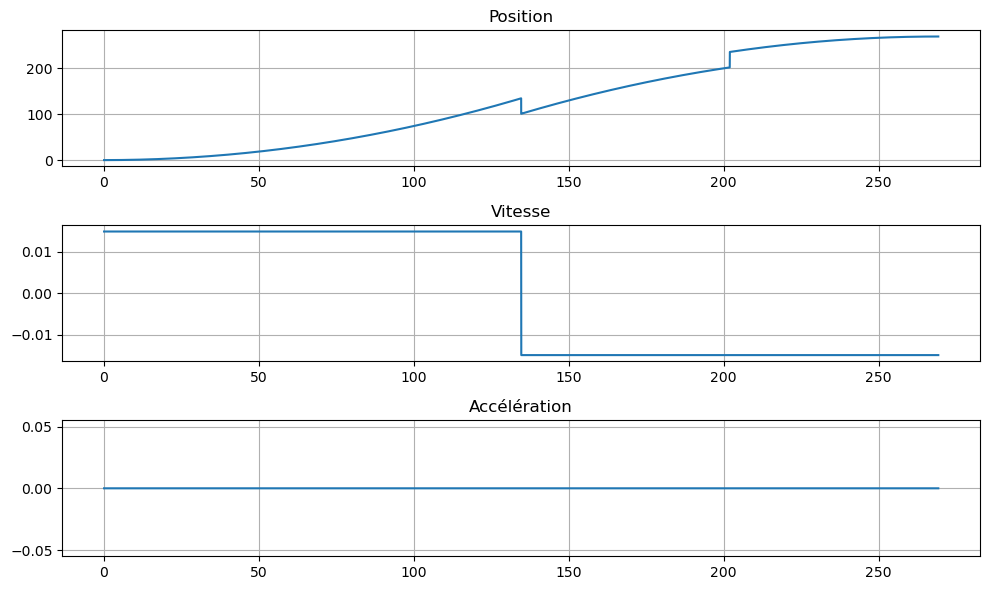

In [75]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

class UR3:
    def __init__(self):
        self.nb_ddl =   4
        self.o0o1   =   152 # mm
        self.o1o2   =   120 # mm
        self.o2o3   =   244 # mm
        self.la     =   296 # mm
        self.lb     =   92  # mm

        #Paramètres de DHM
        self.a=[0,0,self.o2o3]
        self.alpha=[0,np.pi/2,0]
        self.r=[self.o0o1,-self.o1o2,0]
        # self.theta = qi 

    def MGD(self,q):
        a=296
        b=92
        # Calcul des matrices de passages
        for i in range(self.nb_ddl-1):
            T=np.array([[np.cos(q[i])                       ,   -np.sin(q[i])                       ,   0                       ,   self.a[i]], 
                        [np.cos(self.alpha[i])*np.sin(q[i]) ,   np.cos(self.alpha[i])*np.cos(q[i])  ,   -np.sin(self.alpha[i])  ,   -self.r[i]*np.sin(self.alpha[i])],
                        [np.sin(self.alpha[i])*np.sin(q[i]) ,   np.sin(self.alpha[i])*np.cos(q[i])  ,   np.cos(self.alpha[i])   ,   self.r[i]*np.cos(self.alpha[i])],
                        [0                                  ,   0                                   ,   0                       ,   1]])
            if i!=0:
                T0N=T0N@T
            else:
                T0N=T

        Vp  = T0N[:3,3:]

        # Détermination de la position du repère de l'OT 
        T0E = T0N @ np.array([[ 1   ,   0   ,   0   ,   a           ], 
                              [ 0   ,   1   ,   0   ,   0           ],
                              [ 0   ,   0   ,   1   ,   b           ],
                              [ 0   ,   0   ,   0   ,   1           ]])

        Vp=T0E[:3,3:]
        X=Vp[0][0]
        Y=Vp[1][0]
        Z=Vp[2][0]

        # Affichage de la position du repère de l'OT 
        #print("\nT0E")
        #print ("Xp = ", Vp[0][0])
        #print ("Yp = ", Vp[1][0])
        #print ("Zp = ", Vp[2][0])

        # Détermination de l'orientation du repère de l’OT avec les angles d'Euler
        la  = (np.arctan2(-T0E[1][2],T0E[2][2]))**2
        nu  = np.arcsin(T0E[0][2])
        v   = np.arctan2(T0E[0][1],T0E[0][0])

        # Affichage de l'orientation du repère de l’OT avec les angles d'Euler
        #print("\nAngles Euler")
        #print ("la = ", la)
        #print ("nu = ", nu)
        #print ("v = ", v)

        return X,Y,Z
    
    def MGI(self,X,Y,Z):
        # Initialisation des variables
        z1 = []
        q1 = []
        q2 = []
        q3 = []
        c3 = []
        all_q = []

        # Détermination des 4 q3
        z1.append(np.sqrt(X**(2) + Y**(2) - (self.lb - self.o2o3)**(2)))
        z1.append(0)
        z1.append(z1[0])
        z1.append(z1[1])
        z2 = Z - self.o0o1

        c3 = (z1[0]**(2) + z2**(2) - X**(2) - Y**(2)) / (2 * X * Y)

        q3.append(np.arctan2(np.sqrt(1 - c3**(2)), c3))
        q3.append(q3[0])
        q3.append(np.arctan2(-np.sqrt(1 - c3**(2)), c3))
        q3.append(q3[2])

        # Détermination de q1 et q2 pour chaque q3
        for i in range (len(q3)):
            b1=X+Y*c3
            b2=Y*np.sin(q3[i])

            s2=(b1*z2-b2*z1[i])/(b1**(2)+b2**(2))
            c2=(b1*z1[i]+b2*z2)/(b1**(2)+b2**(2))

            q2.append(m.atan2(s2,c2))

            x1_1=self.lb-self.o1o2
            y1_1=self.la*np.cos(q2[i]+q3[i])+self.o2o3*np.cos(q2[i])
            z1_1=X
            x2_1=self.la*np.cos(q2[i]+q3[i])+self.o2o3*np.cos(q2[i])
            y2_1=-self.lb+self.o1o2
            z2_1=Y

            s1=(z1_1*y2_1-z2_1 * y1_1)/(x1_1*y2_1-x2_1*y1_1)
            c1=(z2_1*x1_1-z1[i] * x2_1)/(x1_1*y2_1-x2_1*y1_1)
            q1.append(m.atan2(s1,c1))

            print([q1[i],q2[i],q3[i]])
            all_q.append([q1[i],q2[i],q3[i]])
        
        return all_q

    def Jacobienne(self,q):
        
        t= np.array([   [-self.la*np.sin(q[0])*np.cos(q[1]+q[1])+b*np.cos(q[0])-self.o1o2*np.cos(q[0])-self.o2o3*np.cos(q[1])*np.sin(q[0])          ,   -self.la*np.cos(q[0])*np.sin(q[1]+q[2])-self.o2o3*np.cos(q[0])*np.sin(q[1]) ,   -self.la*np.cos(q[0])*np.sin(q[1]+q[2])  ], 
                        [ self.la*np.cos(q[0])*np.cos(q[1]+q[2])-(self.o0o1+self.o1o2-self.o2o3)*np.sin(q[0])-self.o2o3*np.cos(q[1])*np.cos(q[0])   ,   -self.la*np.sin(q[0])*np.sin(q[1]-q[2])-self.o2o3*np.sin(q[1])*np.sin(q[0]) ,   self.la*np.sin(q[0])*np.sin(q[1]-q[2])   ],
                        [ 0                                                                                                                         ,   self.la*np.cos(q[1]+q[2])+self.o2o3*np.cos(q[1])                            ,   self.la*np.cos(q[2]+q[1])                ]])
        print(t)
        print(np.cos(np.pi/2))
        print(self.o2o3*np.cos(q[1])*np.cos(q[0]))
        print(self.la*np.cos(q[0])*np.cos(q[1]+q[2]))
    
    def MDI(self,A,B,V1,V2):
        # Initialisation des variables
        s0=[]
        s1=[]
        s2=[]
        dAB=np.sqrt((A[0]-B[0])**(2)+(A[1]-B[1])**(2)+(A[2]-B[2])**(2))
        T=dAB/(V2+2*V1)
        K1=V1/T
        K2=(V2-V1)/T
        
        # Détermination du MDI
        t=[0,T]
        s2.append(K1)
        s1.append(K1*t)
        s0.append((1/2)*K1*t**(2))

        t=[T,2*T]
        s2.append(K2)
        s1.append(K2*(t-T)+V1)
        s0.append((K2/2)*(t-T)**(2)+V1*(t-T)+1/2*K1*T**(2))

        t=[2*T,3*T]
        s2.append(-K2)
        s1.append(-K2*(t-2*T)+V2)
        s0.append((-K2/2)*(t-2*T)**(2)+V2*(t-2*T)+(((T/2)**(2))*(K2+K1)+V1*T))

        t=[3*T,4*T]
        s2.append(-K1)
        s1.append(-K1*(-K1*(t-3*T))+V1)
        s0.append((-K1/2)*(t-3*T)**(2)+V1*(t-3*T)+((T**(2))/2)*K1+T*(V1+V2))

# Création d'une instance du robot UR3 et initialisation des paramètres q
robot = UR3()
qdeg=[np.pi/2,0,0]

# MGD
X,Y,Z=robot.MGD(qdeg)

# MGI
g=robot.MGI(X,Y,Z)
#print(robot.MGD(g[0]))
#print(robot.MGD(g[1]))
#print(robot.MGD(g[2]))
#print(robot.MGD(g[3]))
#print("\nqdeg=",qdeg[0],qdeg[1],qdeg[2])

# Jacobienne
#j=robot.Jacobienne(qdeg)
#print("\n Jacobienne:",j)

# MDI
A=[200,200,100]
B=[300,350,300]
robot.MDI(A,B,1,2)
